In [77]:
import pandas as pd

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project/Music/data.csv.zip",compression='zip')
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [80]:
data.drop_duplicates(inplace=True,subset=['name'])

In [81]:
name=data['name']

In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [83]:
col_features = ['danceability', 'energy', 'valence', 'loudness']
X = MinMaxScaler().fit_transform(data[col_features])
kmeans = KMeans(init="k-means++",
                n_clusters=2,
                random_state=15).fit(X)
data['kmeans'] = kmeans.labels_

In [84]:
data['song_name']=name

In [85]:
print(data.columns)

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year', 'kmeans', 'song_name'],
      dtype='object')


In [86]:
cluster=data.groupby(by=data['kmeans'])

In [87]:
#y=data.pop('kmeans')
#x=data.drop(columns=['name','artists','id','release_date','song_name'])
y = data['kmeans']
x = data.drop(columns=['name','artists','id','release_date','song_name', 'kmeans']) # Explicitly drop 'kmeans' from x

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [89]:
!pip install lightgbm
from lightgbm import LGBMClassifier
model=LGBMClassifier().fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 58109, number of negative: 41596
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2759
[LightGBM] [Info] Number of data points in the train set: 99705, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582809 -> initscore=0.334317
[LightGBM] [Info] Start training from score 0.334317


In [90]:
model.score(x_train,y_train)

0.9992277217792488

In [91]:
model.score(x_test,y_test)

0.9945539341056115

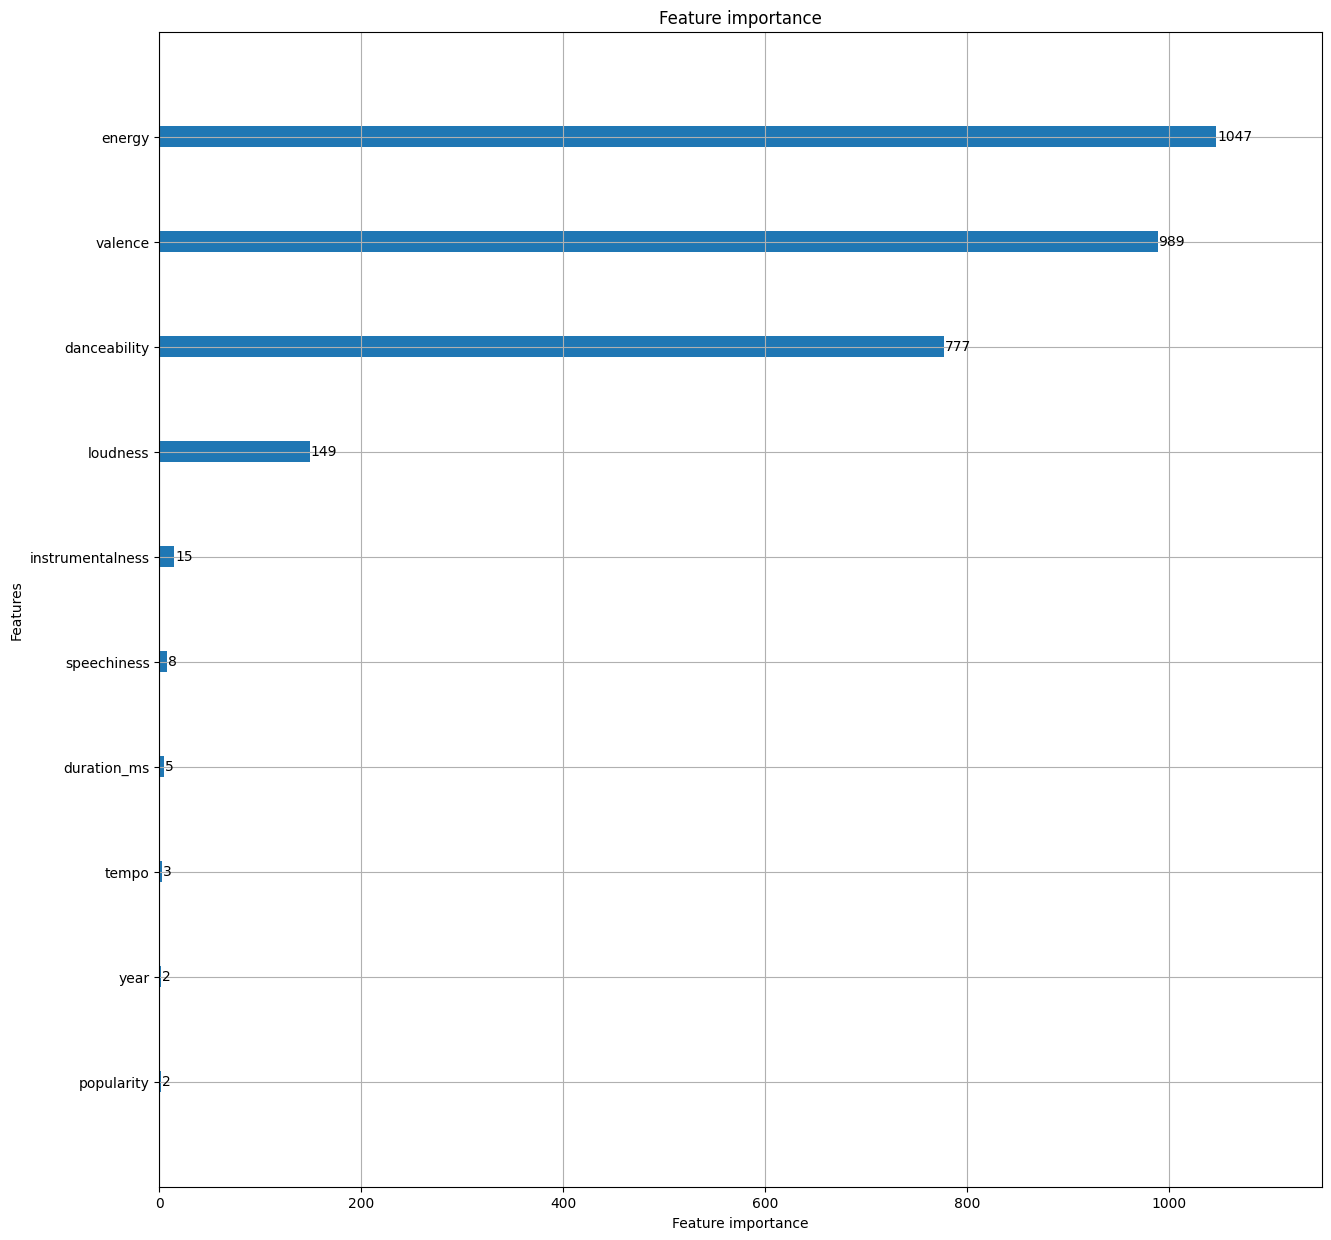

In [92]:
import lightgbm
import matplotlib.pyplot as plt
ax = lightgbm.plot_importance(model, max_num_features=10, figsize=(15,15))
plt.show()

In [94]:
df=cluster.apply(lambda x: x.sort_values(["popularity"],ascending=False))
df.reset_index(level=0, drop=True)

<ipython-input-94-0b3087d44206>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df=cluster.apply(lambda x: x.sort_values(["popularity"],ascending=False))


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,kmeans,song_name
87949,0.731,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,0.6960,...,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020,0,death bed (coffee for your head) (feat. beabad...
87941,0.233,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,...,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020,0,THE SCOTTS
87856,0.751,['Lewis Capaldi'],0.501,182161,0.405,0,7qEHsqek33rTcFNT9PFqLf,0.000000,1,0.1050,...,1,Someone You Loved,92,2019-05-17,0.0319,109.891,0.446,2019,0,Someone You Loved
87857,0.902,['Billie Eilish'],0.704,245426,0.225,0,3ZCTVFBt2Brf31RLEnCkWJ,0.657000,6,0.1060,...,0,everything i wanted,90,2019-11-13,0.0994,120.006,0.243,2019,0,everything i wanted
87747,0.934,"['Billie Eilish', 'Khalid']",0.351,200186,0.296,0,0u2P5u6lvoDfwTYjAADbn4,0.000000,4,0.0950,...,0,lovely (with Khalid),89,2018-04-19,0.0333,115.284,0.120,2018,0,lovely (with Khalid)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.994,['Kostas Tsanakos'],0.475,30000,0.277,0,48gD3QaOgrZvyr3vhMuG1R,0.000742,11,0.2990,...,0,To koritsi sou kira mou,0,1930-01-01,0.0465,93.681,0.968,1930,1,To koritsi sou kira mou
154,0.988,"['Francisco Canaro', 'Charlo']",0.631,179493,0.254,0,48scMLeZSqaJoTStmQIlHI,0.527000,1,0.1060,...,1,Mejicana Ven - Remasterizado,0,1930-11-20,0.0604,99.762,0.713,1930,1,Mejicana Ven - Remasterizado
158,0.904,"['Giorgos Papasideris', 'Klarino Har. Margels']",0.502,192067,0.494,0,49gHX66DkP4yrMT6hng6UO,0.933000,9,0.0844,...,0,Gia Sou Kaimeni Leventia,0,1930-01-01,0.0388,112.033,0.931,1930,1,Gia Sou Kaimeni Leventia
43,0.995,['Francisco Canaro'],0.729,174720,0.191,0,6hcPbniXegOud4FNv8Efxz,0.455000,4,0.1030,...,0,Timbero - Instrumental (Remasterizado),0,1928-09-17,0.1080,112.565,0.902,1928,1,Timbero - Instrumental (Remasterizado)


In [95]:
from keras.preprocessing.image import img_to_array
import imutils
from keras.models import load_model
import numpy as np
import cv2

In [96]:
detection_model_path = 'haarcascade_frontalface_default.xml'
emotion_model_path = 'final_model3.h5'
face_detection = cv2.CascadeClassifier(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)
EMOTIONS = ["happy","sad"]

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'final_model3.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
'''from keras.preprocessing import image
def emotion_testing():
        cap=cv2.VideoCapture(0)
        while True:
            ret,test_img=cap.read()# captures frame and returns boolean value and captured image
            if not ret:
                continue
            gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

            faces_detected = face_detection.detectMultiScale(gray_img, 1.32, 5)


            for (x,y,w,h) in faces_detected:
                cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
                roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
                roi_gray=cv2.resize(roi_gray,(48,48))
                img_pixels = image.img_to_array(roi_gray)
                img_pixels = np.expand_dims(img_pixels, axis = 0)
                img_pixels /= 255

                predictions = emotion_classifier.predict(img_pixels)

                #find max indexed array
                max_index = np.argmax(predictions[0])
                predicted_emotion = EMOTIONS[max_index]

                cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

            resized_img = cv2.resize(test_img, (1000, 700))
            cv2.imshow('Facial emotion analysis ',resized_img)



            if cv2.waitKey(0) & 0xFF == ord('q'):
                     break
        cap.release()
        cv2.destroyAllWindows
        return predicted_emotion'''

In [106]:
def emotion_testing():
  return 'happy'

In [107]:
emotion_word=emotion_testing()
if emotion_word=='sad':
    emotion_code=0
else:
    emotion_code=1

In [108]:
def get_results(emotion_code):
  NUM_RECOMMEND=10
  happy_set=[]
  sad_set=[]
  if emotion_code==0:
      happy_set.append(df[df['kmeans']==0]['song_name'].head(NUM_RECOMMEND))
      return pd.DataFrame(happy_set).T
  else:
      sad_set.append(df[df['kmeans']==1]['song_name'].head(NUM_RECOMMEND))
      return pd.DataFrame(sad_set).T

In [109]:
print(get_results(emotion_code))
if emotion_word=='sad':
    print('emotion detected is SAD')
else:
    print('emotion detected is HAPPY')

                                         song_name
kmeans                                            
1      87844                            Supalonely
       87852  ily (i love you baby) (feat. Emilee)
       87858                          Dance Monkey
       87951                                 GOOBA
       87952       Rain On Me (with Ariana Grande)
       87953     Stuck with U (with Justin Bieber)
       87850                       Don't Start Now
       87977                               Safaera
       87843                               ROXANNE
       87969                            Boss Bitch
emotion detected is HAPPY
